In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def display_img(img, cmap=None):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

### Read image

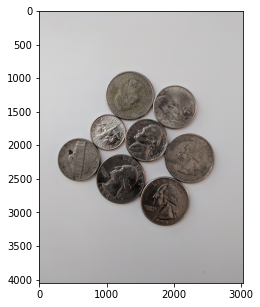

In [13]:
img = cv2.cvtColor(cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\coins_on_white.jpg'), cv2.COLOR_BGR2RGB)
display_img(img)

### Blur

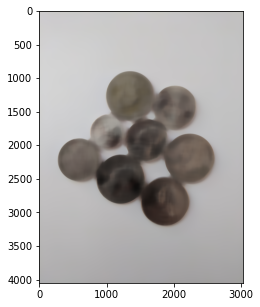

In [34]:
blurred = cv2.medianBlur(img, 101)
display_img(blurred)

### Grayscale

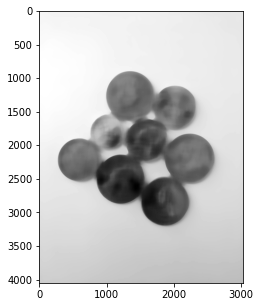

In [35]:
gray_blurred = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)
display_img(gray_blurred, cmap='gray')

### Otsu's threshold

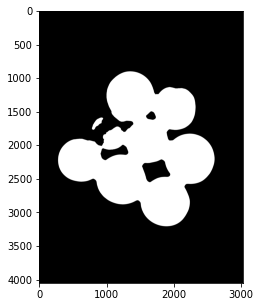

In [68]:
ret, thres = cv2.threshold(gray_blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display_img(thres, 'gray')

### Noise removal

In [69]:
kernel = np.ones((3,3), np.uint8)

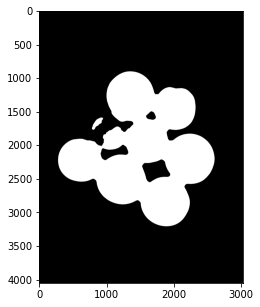

In [70]:
opening = cv2.morphologyEx(thres, cv2.MORPH_OPEN, kernel, iterations=2)
display_img(opening, 'gray')

### Background

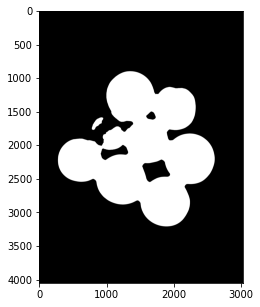

In [71]:
bg = cv2.dilate(opening, kernel, iterations=2)
display_img(bg, 'gray')

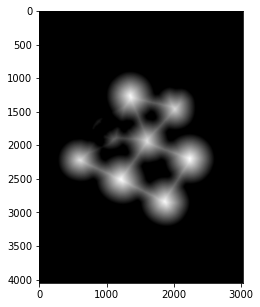

In [72]:
dis_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
display_img(dis_transform, 'gray')

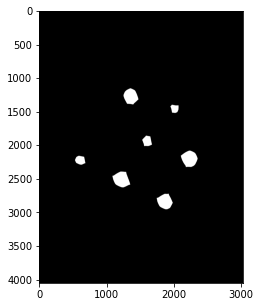

In [73]:
ret, fg = cv2.threshold(dis_transform, 0.7*dis_transform.max(), 255, cv2.THRESH_BINARY)
display_img(fg, 'gray')

In [76]:
fg = np.uint8(fg)

### Unknow region

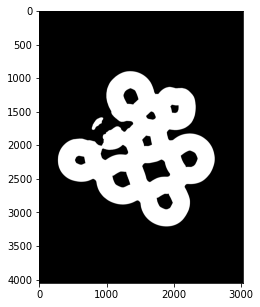

In [78]:
unk = cv2.subtract(bg, fg)
display_img(unk, 'gray')

### Connected components

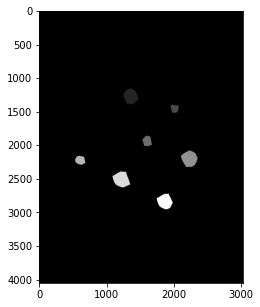

In [88]:
ret, markers = cv2.connectedComponents(fg)
display_img(markers, 'gray')

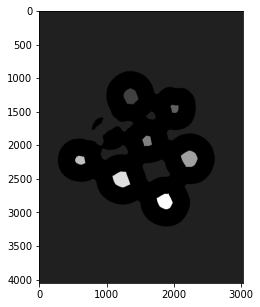

In [89]:
markers += 1
markers[unk == 255] = 0
display_img(markers, 'gray')

### Watershed

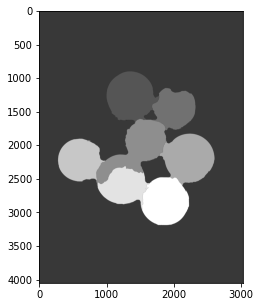

In [90]:
markers = cv2.watershed(blurred, markers)
display_img(markers, 'gray')

### Contours

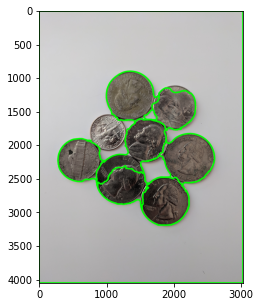

In [91]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (0,255,0), 20)

display_img(img)

In [95]:
len(contours)

11

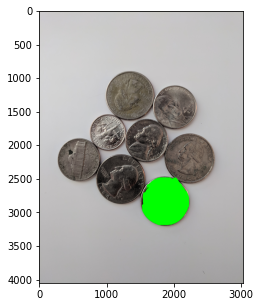

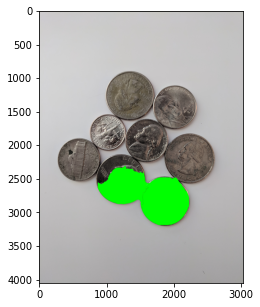

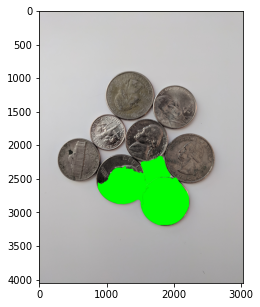

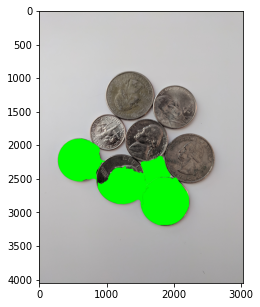

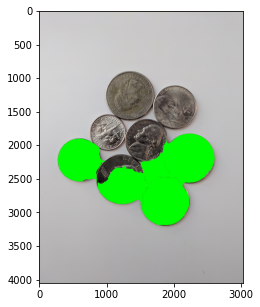

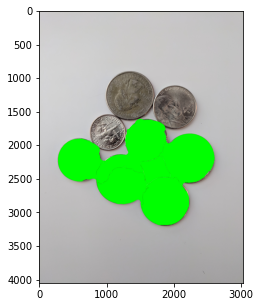

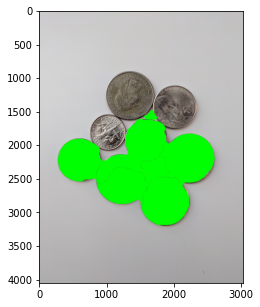

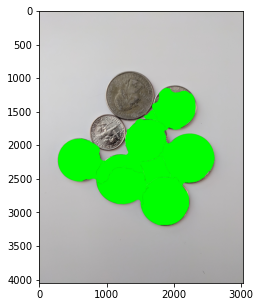

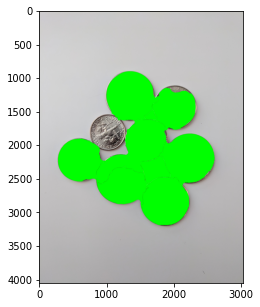

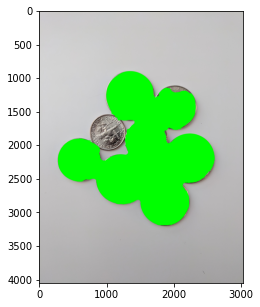

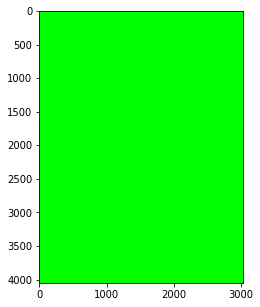

In [99]:
img = cv2.cvtColor(cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\coins_on_white.jpg'), cv2.COLOR_BGR2RGB)

for i in range(len(contours)):
    cv2.drawContours(img, contours, i, (0,255,0), -1)
    display_img(img)

In [100]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [10,  8, -1, -1],
        [-1,  9, -1, -1]]], dtype=int32)